<a href="https://colab.research.google.com/github/engelsm/mless_fork/blob/main/homework2/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*#author* Marlon Engels

# Task 1 of HW2

Most of this file contains my code, and thus I will not separately mark my contributions but rather explain when code is taken from existing notebooks.

In [ ]:
#Load local files
from google.colab import files
uploaded = files.upload()

Saving LSTM_multistep_forecast_DENW094.csv to LSTM_multistep_forecast_DENW094.csv
Saving LSTM_rollingonestep_forecast_DENW094.csv to LSTM_rollingonestep_forecast_DENW094.csv
Saving mlp_forecast_DENW094.csv to mlp_forecast_DENW094.csv
Saving PatchTST_forecast_DENW094.csv to PatchTST_forecast_DENW094.csv
Saving sarima_forecast_DENW094.csv to sarima_forecast_DENW094.csv
Saving X_test_sample_DENW094.csv to X_test_sample_DENW094.csv
Saving y_test_sample_DENW094.csv to y_test_sample_DENW094.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import io

# Load CSV files using io.BytesIO to read the byte content
sarima_df = pd.read_csv(io.BytesIO(uploaded["sarima_forecast_DENW094.csv"]))
mlp_df = pd.read_csv(io.BytesIO(uploaded["mlp_forecast_DENW094.csv"]))
lstm_multistep_df = pd.read_csv(io.BytesIO(uploaded["LSTM_multistep_forecast_DENW094.csv"]))
lstm_rollingonestep_df = pd.read_csv(io.BytesIO(uploaded["LSTM_rollingonestep_forecast_DENW094.csv"]))
patchtst_df = pd.read_csv(io.BytesIO(uploaded["PatchTST_forecast_DENW094.csv"]))
x_test_sample_df = pd.read_csv(io.BytesIO(uploaded["X_test_sample_DENW094.csv"]))
y_test_sample_df = pd.read_csv(io.BytesIO(uploaded["y_test_sample_DENW094.csv"]))

# Extract forecast arrays
forecasts = {
    "MLP": mlp_df["forecast_values"].values,
    "LSTM_multistep": lstm_multistep_df["forecast_values"].values,
    "LSTM_rollingonestep": lstm_rollingonestep_df["forecast_values"].values,
    "SARIMA": sarima_df["forecast_values"].values,
    "PatchTST": patchtst_df["forecast_values"].values,
}

# Extract X_test_sample and y_test_sample arrays
X_test_sample = x_test_sample_df.values.flatten()   # Flatten to 1D array
y_test_sample = y_test_sample_df.values.flatten()

In [ ]:
import matplotlib.pyplot as plt

def plot_forecast_comparison(X_context, y_actual, forecasts, context_window=336, prediction_horizon=96, title="Forecast Comparison", xlabel="Time Step", ylabel="Temperature Level"):
    """
    Plots the context window, actual future values, and multiple forecast results on a single plot.

    Parameters:
        X_context (array-like): The context/past data (shape: [context_window])
        y_actual (array-like): The true future values (shape: [prediction_horizon])
        forecasts (dict): Dictionary where keys are model names and values are forecast arrays (shape: [prediction_horizon])
        context_window (int): Number of past time steps shown before forecast starts
        prediction_horizon (int): Number of future time steps to plot
        title (str): Title of the plot
        xlabel (str): Label for the x-axis
        ylabel (str): Label for the y-axis
    """

    plt.figure(figsize=(14, 8))

    # Plot context
    plt.plot(range(context_window), X_context, label="Context (Past)", color="blue", marker="o")

    # Plot actual future
    plt.plot(range(context_window, context_window + prediction_horizon), y_actual, label="Actual Future", color="green", marker="o")

    # Plot each forecast
    for model_name, forecast_values in forecasts.items():
        plt.plot(range(context_window, context_window + prediction_horizon),
                 forecast_values,
                 label=f"{model_name} Forecast",
                 linestyle="--",
                 marker="x")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

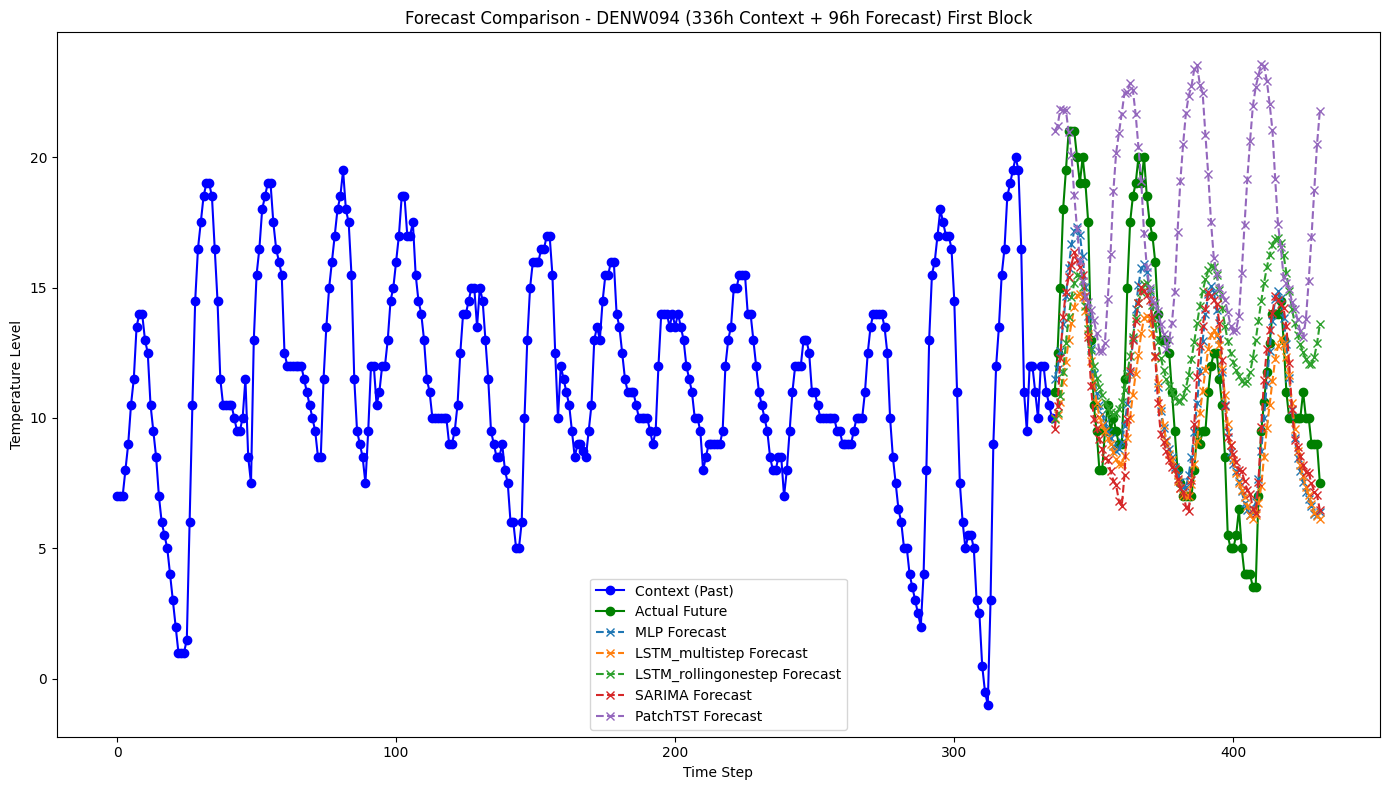

In [ ]:
plot_forecast_comparison(
    X_test_sample,
    y_test_sample,
    forecasts,
    context_window=336,
    prediction_horizon=96,
    title="Forecast Comparison - DENW094 (336h Context + 96h Forecast) First Block"
)

This notebook completes Task 1 of HW2 by plotting forecast results from multiple models for the DENW094 station. It loads CSV files containing forecasts from SARIMA, MLP, LSTM (multistep and rolling one-step), and PatchTST models, along with test data (X_test_sample and y_test_sample). The `plot_forecast_comparison` function visualizes the 336-hour context window, 96-hour actual future values, and model forecasts in a single plot. Each model's predictions are plotted with distinct dashed lines and markers for clarity.